In [2]:
import pandas as pd
import numpy as np

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)


In [5]:
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [5]:
# 1번 연간 서울교통공사 매출액 및 손실율 추이 파악 (2017-2021)
# 활용 데이터 서울교통공사 재무제표(2017-2021) → 연간 매출액 및 적자비용 추출
# 단위 백만원 
#2017년 자료 2017.05.31~2017.12.31

In [6]:
data = {'2017':[1145373, 407415], 
       '2018':[1986511, 538892], 
       '2019':[2004643, 586467], 
       '2020':[1559524, 1113736], 
       '2021':[1629129, 964440]}

In [7]:
budget= pd.DataFrame(data=data, index=['매출액', '손실액'])
budget

,2017,2018,2019,2020,2021
매출액,1145373,1986511,2004643,1559524,1629129
손실액,407415,538892,586467,1113736,964440


<AxesSubplot:>

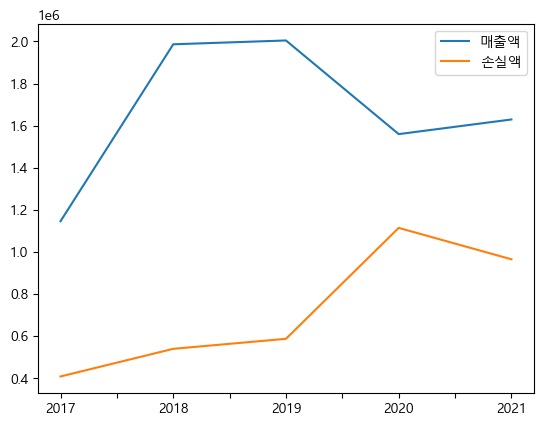

In [8]:
budget.T.plot()

In [9]:
lratio = round(budget.iloc[1] / budget.iloc[0]*100, 2)
lratio

2017    35.57
2018    27.13
2019    29.26
2020    71.42
2021    59.20
dtype: float64

In [15]:
# budget[:'손실비율'].T = lratio
# budget.loc[2]=[lratio]
budget2= budget.append(lratio, ignore_index=True)
budget2

C:\Users\82102\AppData\Local\Temp\ipykernel_21456\3534758734.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  budget2= budget.append(lratio, ignore_index=True)


,2017,2018,2019,2020,2021
0,1145373.00,1986511.00,2004643.00,1559524.00,1629129.0
1,407415.00,538892.00,586467.00,1113736.00,964440.0
2,35.57,27.13,29.26,71.42,59.2


In [10]:
# budget2=budget.T
# budget3=pd.concat([budget2,lratio])
# budget3.T

In [16]:
budget3= budget2.rename(index={0:'매출액', 1:'손실액', 2:'손실비율'})
budget3.index.name='서울교통공사'
budget3

,2017,2018,2019,2020,2021
서울교통공사,,,,,
매출액,1145373.00,1986511.00,2004643.00,1559524.00,1629129.0
손실액,407415.00,538892.00,586467.00,1113736.00,964440.0
손실비율,35.57,27.13,29.26,71.42,59.2


In [17]:
#증감율 [(최종수치-최초수치)/최초수치]*100

hl18=round((27.13-35.57)/35.57*100, 2)
hl19=round((29.26-27.13)/27.13*100, 2)
hl20=round((71.42-29.26)/29.26*100, 2)
hl21=round((59.2-71.42)/71.42*100, 2)

In [18]:
budget3.loc['손실비율증감']=[np.nan, hl18, hl19, hl20, hl21]
budget3

,2017,2018,2019,2020,2021
서울교통공사,,,,,
매출액,1145373.00,1986511.00,2004643.00,1559524.00,1629129.00
손실액,407415.00,538892.00,586467.00,1113736.00,964440.00
손실비율,35.57,27.13,29.26,71.42,59.20
손실비율증감,NaN,-23.73,7.85,144.09,-17.11


In [19]:
budget4=budget3.fillna(0)
budget4

,2017,2018,2019,2020,2021
서울교통공사,,,,,
매출액,1145373.00,1986511.00,2004643.00,1559524.00,1629129.00
손실액,407415.00,538892.00,586467.00,1113736.00,964440.00
손실비율,35.57,27.13,29.26,71.42,59.20
손실비율증감,0.00,-23.73,7.85,144.09,-17.11


In [20]:
budget5=budget4.T
budget5

서울교통공사,매출액,손실액,손실비율,손실비율증감
2017,1145373.0,407415.0,35.57,0.00
2018,1986511.0,538892.0,27.13,-23.73
2019,2004643.0,586467.0,29.26,7.85
2020,1559524.0,1113736.0,71.42,144.09
2021,1629129.0,964440.0,59.20,-17.11


In [21]:
budget6=budget5[['손실비율증감']]
budget6.columns.name='연도'
budget6

연도,손실비율증감
2017,0.00
2018,-23.73
2019,7.85
2020,144.09
2021,-17.11


In [22]:
budget7=budget5[['손실비율']]
budget7.columns.name='연도'
budget7

연도,손실비율
2017,35.57
2018,27.13
2019,29.26
2020,71.42
2021,59.20


<AxesSubplot:>

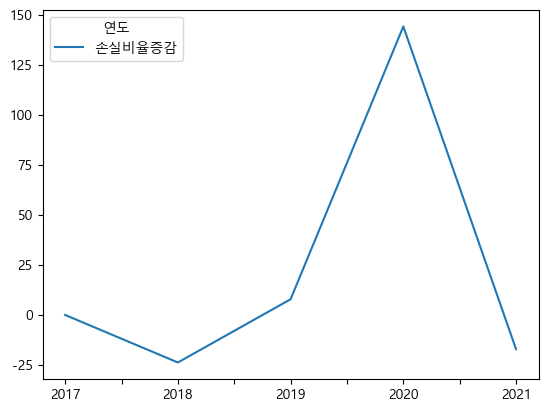

In [23]:
budget6.plot()

<AxesSubplot:>

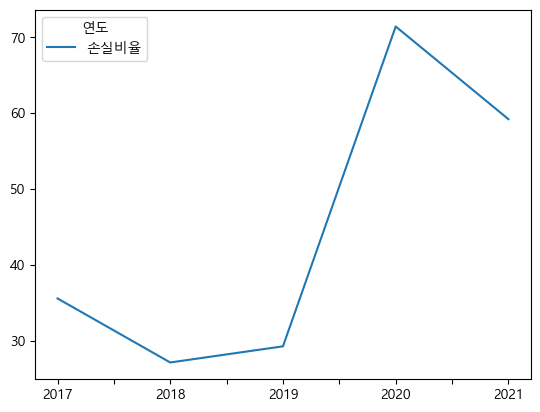

In [24]:
budget7.plot()

In [25]:
budget8=budget5[['손실비율','손실비율증감']]
budget8.columns.name='연도'
budget8

연도,손실비율,손실비율증감
2017,35.57,0.00
2018,27.13,-23.73
2019,29.26,7.85
2020,71.42,144.09
2021,59.20,-17.11


In [26]:
budget9=budget8.T
budget9.index.name='서울교통공사'
budget9

,2017,2018,2019,2020,2021
서울교통공사,,,,,
손실비율,35.57,27.13,29.26,71.42,59.20
손실비율증감,0.00,-23.73,7.85,144.09,-17.11


<AxesSubplot:>

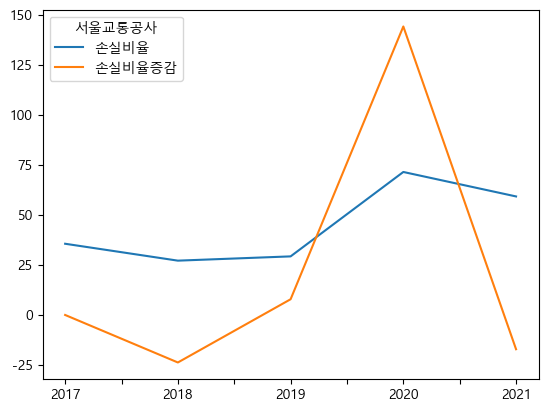

In [27]:
budget8.plot()

In [ ]:
#2번

In [24]:
seoul_count = pd.read_csv("teamproject/인구추이(주민등록인구)_20230207155306.csv",encoding='utf-8'
                  )
seoul_count

,구분별(1),구분별(2),1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,인구,소계,9501413,9639110,9798542,9991089,10286503,10576794,10612577,10904527,10969862,10925464,10798700,10595943,10469852,10389057,10321496,10321449,10373234,10331244,10280523,10276968,10287847,10297004,10356202,10421782,10456034,10464051,10575447,10528774,10442426,10388055,10369593,10297138,10204057,10124579,10049607,10010983,9911088,9736027,9667669
1,인구,한국인,9491503,9625755,9786536,9979577,10276308,10566447,10603250,10873055,10935230,10889499,10759454,10550871,10418076,10336134,10270506,10264260,10311314,10263336,10207295,10174086,10173162,10167344,10181166,10192710,10200827,10208302,10312545,10249679,10195318,10143645,10103233,10022181,9930616,9857426,9765623,9729107,9668465,9509458,9428372
2,65세이상고령자,소계,275165,211283,304923,329370,348543,362507,362653,424332,434348,445236,454007,460144,469079,485347,505438,530190,560446,585897,612783,649755,693225,735902,786580,852235,898700,942946,1007572,1049425,1110995,1167177,1221616,1267563,1300877,1365126,1416131,1485272,1568331,1605416,1667411


In [25]:
seoul_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분별(1)  3 non-null      object
 1   구분별(2)  3 non-null      object
 2   1984    3 non-null      int64 
 3   1985    3 non-null      int64 
 4   1986    3 non-null      int64 
 5   1987    3 non-null      int64 
 6   1988    3 non-null      int64 
 7   1989    3 non-null      int64 
 8   1990    3 non-null      int64 
 9   1991    3 non-null      int64 
 10  1992    3 non-null      int64 
 11  1993    3 non-null      int64 
 12  1994    3 non-null      int64 
 13  1995    3 non-null      int64 
 14  1996    3 non-null      int64 
 15  1997    3 non-null      int64 
 16  1998    3 non-null      int64 
 17  1999    3 non-null      int64 
 18  2000    3 non-null      int64 
 19  2001    3 non-null      int64 
 20  2002    3 non-null      int64 
 21  2003    3 non-null      int64 
 22  2004    3 non-null      int64 

In [26]:
seoul_count.isnull().sum()

구분별(1)    0
구분별(2)    0
1984      0
1985      0
1986      0
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
2021      0
2022      0
dtype: int64

In [27]:
seoul_count.isna().sum()

구분별(1)    0
구분별(2)    0
1984      0
1985      0
1986      0
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
2021      0
2022      0
dtype: int64

In [28]:
seoul_count.index

RangeIndex(start=0, stop=3, step=1)

In [29]:
seoul_count1=seoul_count.drop(1)
seoul_count1

,구분별(1),구분별(2),1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,인구,소계,9501413,9639110,9798542,9991089,10286503,10576794,10612577,10904527,10969862,10925464,10798700,10595943,10469852,10389057,10321496,10321449,10373234,10331244,10280523,10276968,10287847,10297004,10356202,10421782,10456034,10464051,10575447,10528774,10442426,10388055,10369593,10297138,10204057,10124579,10049607,10010983,9911088,9736027,9667669
2,65세이상고령자,소계,275165,211283,304923,329370,348543,362507,362653,424332,434348,445236,454007,460144,469079,485347,505438,530190,560446,585897,612783,649755,693225,735902,786580,852235,898700,942946,1007572,1049425,1110995,1167177,1221616,1267563,1300877,1365126,1416131,1485272,1568331,1605416,1667411


In [30]:
seoul_count2=seoul_count1.T
seoul_count2

,0,2
구분별(1),인구,65세이상고령자
구분별(2),소계,소계
1984,9501413,275165
1985,9639110,211283
1986,9798542,304923
1987,9991089,329370
1988,10286503,348543
1989,10576794,362507
1990,10612577,362653
1991,10904527,424332


In [31]:

seoul_count2=seoul_count2.drop(['구분별(1)','구분별(2)'])
seoul_count2

,0,2
1984,9501413,275165
1985,9639110,211283
1986,9798542,304923
1987,9991089,329370
1988,10286503,348543
1989,10576794,362507
1990,10612577,362653
1991,10904527,424332
1992,10969862,434348
1993,10925464,445236


In [32]:
seoul_count3=seoul_count2.rename(columns={0:'서울시 인구수',2:'65세이상 고령자'})
seoul_count3

,서울시 인구수,65세이상 고령자
1984,9501413,275165
1985,9639110,211283
1986,9798542,304923
1987,9991089,329370
1988,10286503,348543
1989,10576794,362507
1990,10612577,362653
1991,10904527,424332
1992,10969862,434348
1993,10925464,445236


In [33]:
seoul_count3

,서울시 인구수,65세이상 고령자
1984,9501413,275165
1985,9639110,211283
1986,9798542,304923
1987,9991089,329370
1988,10286503,348543
1989,10576794,362507
1990,10612577,362653
1991,10904527,424332
1992,10969862,434348
1993,10925464,445236


<AxesSubplot:>

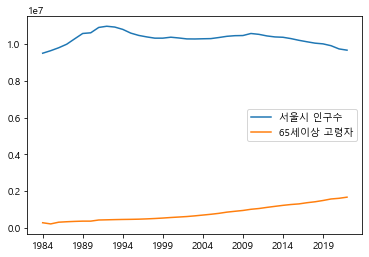

In [34]:
seoul_count3.plot()

In [32]:
seoul_old = pd.read_csv("teamproject/무임승차_대상별_현황_20230206161601.csv",encoding='cp949'
                  )
seoul_old

,운영기관별(1),2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,2019,2019.1,2019.2,2019.3,...,2019.5,2019.6,2019.7,2019.8,2019.9,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
0,운영기관별(1),계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,...,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타
1,운영기관별(1),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),...,무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원)
2,합계,-,-,-,-,-,-,-,-,-,-,465831,625632,380263,510596,79858,107380,5392,7257,318,399,497095,666935,408946,548561,...,110617,5497,7348,327,409,358371,459355,293476,376924,60612,76881,3918,5075,365,475,380197,510236,315412,423193,60463,81260,3855,5168,467,615
3,서울교통공사,258250,350647,208466,283059,46405,63000,3379,4588,-,-,261047,353974,212843,288617,44967,60969,3237,4388,-,-,273841,370926,225094,304929,...,61831,3103,4166,-,-,195690,264255,160053,216135,33460,45181,2177,2939,-,-,205748,278438,170771,231108,32868,44477,2109,2853,-,-
4,서울메트로 9호선(주),12440,15550,9746,12182,2529,3161,165,206,-,-,12824,16030,10156,12694,2508,3136,160,200,-,-,13750,17188,11024,13780,...,3183,180,225,-,-,9900,12375,7863,9829,1888,2360,133,166,16,20,10682,13352,8655,10819,1877,2346,133,166,17,21
5,서울교통공사9호선운영부문,1350,1688,1103,1379,228,285,19,24,-,-,1668,2085,1387,1734,252,315,29,36,-,-,4319,5399,3559,4449,...,725,180,225,-,-,3353,4191,2724,3406,459,573,170,212,-,-,3789,4736,3118,3897,485,606,186,233,-,-
6,부산교통공사,93418,124801,77631,103710,14854,19843,934,1248,-,-,95673,130636,79920,109126,14717,20095,1036,1415,-,-,102235,139620,85759,117118,...,20996,1102,1506,-,-,76634,104456,64212,87524,11611,15826,811,1106,-,-,80009,109034,67718,92284,11502,15675,789,1075,0,0
7,대구도시철도공사,43796,54745,36211,45264,7180,8975,405,506,-,-,45559,56949,37933,47416,7224,9030,402,503,-,-,49140,61425,41228,51535,...,9386,403,504,-,-,33314,41642,27784,34730,5268,6585,262,327,-,-,36742,45927,30933,38666,5540,6924,269,337,0,0
8,인천교통공사,18500,24975,14109,19047,4208,5681,183,247,-,-,20057,27077,15522,20955,4348,5870,187,252,-,-,21965,29653,17259,23300,...,6093,193,260,-,-,15745,-,12267,-,3347,-,131,-,-,-,17794,24022,14077,19004,3583,4838,134,180,0,0
9,광주광역시 도시철도공사,6202,8470,5092,6936,1017,1407,93,127,-,-,6326,8856,5262,7367,984,1378,80,111,-,-,6551,9172,5440,7616,...,1449,76,107,-,-,4468,6256,3625,5076,677,948,40,56,126,176,4564,6389,3660,5123,670,939,37,51,197,276


In [33]:
seoul_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 51 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   운영기관별(1)  16 non-null     object
 1   2017      16 non-null     object
 2   2017.1    16 non-null     object
 3   2017.2    16 non-null     object
 4   2017.3    16 non-null     object
 5   2017.4    16 non-null     object
 6   2017.5    16 non-null     object
 7   2017.6    16 non-null     object
 8   2017.7    16 non-null     object
 9   2017.8    16 non-null     object
 10  2017.9    16 non-null     object
 11  2018      16 non-null     object
 12  2018.1    16 non-null     object
 13  2018.2    16 non-null     object
 14  2018.3    16 non-null     object
 15  2018.4    16 non-null     object
 16  2018.5    16 non-null     object
 17  2018.6    16 non-null     object
 18  2018.7    16 non-null     object
 19  2018.8    16 non-null     object
 20  2018.9    16 non-null     object
 21  2019      16 non-n

In [34]:
seoul_old.columns

Index(['운영기관별(1)', '2017', '2017.1', '2017.2', '2017.3', '2017.4', '2017.5',
       '2017.6', '2017.7', '2017.8', '2017.9', '2018', '2018.1', '2018.2',
       '2018.3', '2018.4', '2018.5', '2018.6', '2018.7', '2018.8', '2018.9',
       '2019', '2019.1', '2019.2', '2019.3', '2019.4', '2019.5', '2019.6',
       '2019.7', '2019.8', '2019.9', '2020', '2020.1', '2020.2', '2020.3',
       '2020.4', '2020.5', '2020.6', '2020.7', '2020.8', '2020.9', '2021',
       '2021.1', '2021.2', '2021.3', '2021.4', '2021.5', '2021.6', '2021.7',
       '2021.8', '2021.9'],
      dtype='object')

In [35]:
seoul_old1=seoul_old.iloc[[0,1,3],0:]
seoul_old1

,운영기관별(1),2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,2019,2019.1,2019.2,2019.3,...,2019.5,2019.6,2019.7,2019.8,2019.9,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
0,운영기관별(1),계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,...,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타
1,운영기관별(1),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),...,무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원)
3,서울교통공사,258250,350647,208466,283059,46405,63000,3379,4588,-,-,261047,353974,212843,288617,44967,60969,3237,4388,-,-,273841,370926,225094,304929,...,61831,3103,4166,-,-,195690,264255,160053,216135,33460,45181,2177,2939,-,-,205748,278438,170771,231108,32868,44477,2109,2853,-,-


In [36]:
seoul_old1.index

Int64Index([0, 1, 3], dtype='int64')

In [37]:
seoul_old2 = seoul_old1.rename(index = {0:'종류',1:'무임비용',3:'비용'})
seoul_old2 

,운영기관별(1),2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,2019,2019.1,2019.2,2019.3,...,2019.5,2019.6,2019.7,2019.8,2019.9,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
종류,운영기관별(1),계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,...,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타
무임비용,운영기관별(1),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),...,무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원)
비용,서울교통공사,258250,350647,208466,283059,46405,63000,3379,4588,-,-,261047,353974,212843,288617,44967,60969,3237,4388,-,-,273841,370926,225094,304929,...,61831,3103,4166,-,-,195690,264255,160053,216135,33460,45181,2177,2939,-,-,205748,278438,170771,231108,32868,44477,2109,2853,-,-


In [38]:
seuol_old3=seoul_old2.drop('운영기관별(1)',axis=1)
seuol_old3

,2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,2019.8,2019.9,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
종류,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타
무임비용,무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원)
비용,258250,350647,208466,283059,46405,63000,3379,4588,-,-,261047,353974,212843,288617,44967,60969,3237,4388,-,-,273841,370926,225094,304929,45644,61831,3103,4166,-,-,195690,264255,160053,216135,33460,45181,2177,2939,-,-,205748,278438,170771,231108,32868,44477,2109,2853,-,-


In [39]:
seuol_old3=seuol_old3.T
seuol_old3

,종류,무임비용,비용
2017,계,무임승차 (천명),258250
2017.1,계,무임비용 (백만원),350647
2017.2,노인,무임승차 (천명),208466
2017.3,노인,무임비용 (백만원),283059
2017.4,장애인,무임승차 (천명),46405
2017.5,장애인,무임비용 (백만원),63000
2017.6,국가유공자,무임승차 (천명),3379
2017.7,국가유공자,무임비용 (백만원),4588
2017.8,기타,무임승차 (천명),-
2017.9,기타,무임비용 (백만원),-


In [40]:
mark=(seuol_old3.종류 =='계')|(seuol_old3.종류 =='노인')
seuol_old3=seuol_old3[mark]

In [41]:
mark2 =(seuol_old3.무임비용 =='무임비용 (백만원)')
seuol_old4=seuol_old3[mark2]
seuol_old4=seuol_old4.T

In [42]:
seuol_old4=seuol_old4.drop('무임비용')
seuol_old4

,2017.1,2017.3,2018.1,2018.3,2019.1,2019.3,2020.1,2020.3,2021.1,2021.3
종류,계,노인,계,노인,계,노인,계,노인,계,노인
비용,350647,283059,353974,288617,370926,304929,264255,216135,278438,231108


In [43]:

total=seuol_old4.T
total

,종류,비용
2017.1,계,350647
2017.3,노인,283059
2018.1,계,353974
2018.3,노인,288617
2019.1,계,370926
2019.3,노인,304929
2020.1,계,264255
2020.3,노인,216135
2021.1,계,278438
2021.3,노인,231108


In [44]:
mark3=(total.종류 =='계')
total1 =total[mark3].T
total1

,2017.1,2018.1,2019.1,2020.1,2021.1
종류,계,계,계,계,계
비용,350647,353974,370926,264255,278438


In [45]:
total2 = total1.drop('종류')
total2

,2017.1,2018.1,2019.1,2020.1,2021.1
비용,350647,353974,370926,264255,278438


In [46]:
total2=total2.rename(index={'비용':'총 무임비용'})
total2

,2017.1,2018.1,2019.1,2020.1,2021.1
총 무임비용,350647,353974,370926,264255,278438


In [47]:
old=seuol_old4.T
old.columns

Index(['종류', '비용'], dtype='object')

In [48]:
mark4=(old.종류 == '노인')
old1=old[mark4].T
old1

,2017.3,2018.3,2019.3,2020.3,2021.3
종류,노인,노인,노인,노인,노인
비용,283059,288617,304929,216135,231108


In [49]:
old2 = old1.drop('종류')
old2

,2017.3,2018.3,2019.3,2020.3,2021.3
비용,283059,288617,304929,216135,231108


In [50]:
old2=old2.rename(index={'비용':'노인 무임 비용'})
old2

,2017.3,2018.3,2019.3,2020.3,2021.3
노인 무임 비용,283059,288617,304929,216135,231108


In [51]:
old2=old2.rename(columns={'2017.3':'2017','2018.3':'2018','2019.3':'2019','2020.3':'2020','2021.3':'2021',})
total2=total2.rename(columns={'2017.1':'2017','2018.1':'2018','2019.1':'2019','2020.1':'2020','2021.1':'2021',})
old2
total2

,2017,2018,2019,2020,2021
노인 무임 비용,283059,288617,304929,216135,231108


,2017,2018,2019,2020,2021
총 무임비용,350647,353974,370926,264255,278438


In [52]:
seoul_old5=pd.concat([old2,total2])
seoul_old5

,2017,2018,2019,2020,2021
노인 무임 비용,283059,288617,304929,216135,231108
총 무임비용,350647,353974,370926,264255,278438


In [53]:
seoul_old5=seoul_old5.astype(int)

In [54]:
seoul_old5=seoul_old5.T
seoul_old5

,노인 무임 비용,총 무임비용
2017,283059,350647
2018,288617,353974
2019,304929,370926
2020,216135,264255
2021,231108,278438


In [55]:
seoul_old5['비율']=round(seoul_old5['노인 무임 비용']/seoul_old5['총 무임비용']*100,2)
seoul_old5

,노인 무임 비용,총 무임비용,비율
2017,283059,350647,80.72
2018,288617,353974,81.54
2019,304929,370926,82.21
2020,216135,264255,81.79
2021,231108,278438,83.00


In [56]:
seoul_old6=pd.DataFrame(seoul_old5['비율'])
seoul_old6

,비율
2017,80.72
2018,81.54
2019,82.21
2020,81.79
2021,83.00


<AxesSubplot:>

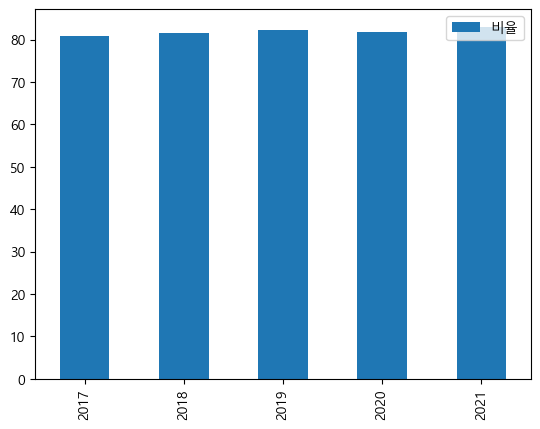

In [57]:
seoul_old6.plot.bar()

In [ ]:
#4번

In [61]:
seoul_year = pd.read_csv("teamproject/서울시 지하철 호선별 역별 유_무임 승하차 인원 정보 (1).csv",encoding='cp949'
                  )
seoul_year

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,작업일자
0,202212,1호선,서울역,1350791,196523,1316828,187268,20230103
1,202212,1호선,시청,672846,96623,665583,93198,20230103
2,202212,1호선,종각,975925,150911,949944,141309,20230103
3,202212,1호선,종로3가,490967,309071,450017,287432,20230103
4,202212,1호선,종로5가,476315,247835,470710,238588,20230103
...,...,...,...,...,...,...,...,...
57389,201501,9호선,노량진,817907,864989,114416,119275,20150206
57390,201501,9호선,사평,70919,67069,14085,13931,20150206
57391,201501,9호선,노들,121496,100670,27470,25964,20150206
57392,201501,9호선,가양,469127,439698,107695,104082,20150206


In [62]:
seoul_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     57394 non-null  int64 
 1   호선명     57394 non-null  object
 2   지하철역    57394 non-null  object
 3   유임승차인원  57394 non-null  int64 
 4   무임승차인원  57394 non-null  int64 
 5   유임하차인원  57394 non-null  int64 
 6   무임하차인원  57394 non-null  int64 
 7   작업일자    57394 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 3.5+ MB


In [63]:
seoul_year.columns

Index(['사용월', '호선명', '지하철역', '유임승차인원', '무임승차인원', '유임하차인원', '무임하차인원', '작업일자'], dtype='object')

In [64]:
seoul_year1=seoul_year[['사용월','유임승차인원','무임승차인원' ]]
seoul_year1

,사용월,유임승차인원,무임승차인원
0,202212,1350791,196523
1,202212,672846,96623
2,202212,975925,150911
3,202212,490967,309071
4,202212,476315,247835
...,...,...,...
57389,201501,817907,864989
57390,201501,70919,67069
57391,201501,121496,100670
57392,201501,469127,439698


In [65]:
seoul_year1.사용월

0        202212
1        202212
2        202212
3        202212
4        202212
          ...  
57389    201501
57390    201501
57391    201501
57392    201501
57393    201501
Name: 사용월, Length: 57394, dtype: int64

In [66]:
mask = (seoul_year1.사용월>201700)&(seoul_year1.사용월<202200)
seoul_year2=seoul_year1[mask]

In [67]:
mask1 = (seoul_year2.사용월<201800)
year = seoul_year2[mask1]
year.reset_index(inplace=True, drop=True)
year

,사용월,유임승차인원,무임승차인원
0,201712,355005,137250
1,201712,174868,134444
2,201712,526470,321642
3,201712,296747,321443
4,201712,1341757,166079
...,...,...,...
6887,201701,46662,32418
6888,201701,14426,6985
6889,201701,7152,4168
6890,201701,53760,18007


In [68]:
year_20171=year.T
year_20171

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,6867,6868,6869,6870,6871,6872,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891
사용월,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,...,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701
유임승차인원,355005,174868,526470,296747,1341757,705560,1485919,741139,381805,568364,2999217,2453067,1311016,940969,1779700,632152,802375,826102,584661,28201,517722,436308,499906,547673,1140749,...,22825,96317,50513,66825,18057,17356,128088,78462,31106,16079,38630,3787,127877,376,178241,136156,198549,664299,316881,14735,46662,14426,7152,53760,6605
무임승차인원,137250,134444,321642,321443,166079,97384,211349,381909,121716,266374,175196,117894,98292,176469,171539,107291,114807,114714,67224,6356,61880,62507,82401,83849,216670,...,6439,65139,13366,7374,5774,4921,46495,28043,14111,6230,14203,2481,32279,216,59177,44548,49471,115479,72260,4570,32418,6985,4168,18007,3160


In [69]:
year_20171['2017년']=year_20171.sum(axis=1)
year_20171

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,6868,6869,6870,6871,6872,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,2017년
사용월,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,...,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,1390161449
유임승차인원,355005,174868,526470,296747,1341757,705560,1485919,741139,381805,568364,2999217,2453067,1311016,940969,1779700,632152,802375,826102,584661,28201,517722,436308,499906,547673,1140749,...,96317,50513,66825,18057,17356,128088,78462,31106,16079,38630,3787,127877,376,178241,136156,198549,664299,316881,14735,46662,14426,7152,53760,6605,2236677884
무임승차인원,137250,134444,321642,321443,166079,97384,211349,381909,121716,266374,175196,117894,98292,176469,171539,107291,114807,114714,67224,6356,61880,62507,82401,83849,216670,...,65139,13366,7374,5774,4921,46495,28043,14111,6230,14203,2481,32279,216,59177,44548,49471,115479,72260,4570,32418,6985,4168,18007,3160,409775569


In [70]:
year_20172=pd.DataFrame(year_20171['2017년'])
year_20173=year_20172.drop('사용월')

In [71]:
year_20173

,2017년
유임승차인원,2236677884
무임승차인원,409775569


In [72]:
mask2 = (seoul_year2.사용월<201900)&(seoul_year2.사용월>201800)
year2 = seoul_year2[mask2]
year2.reset_index(inplace=True, drop=True)
year2

,사용월,유임승차인원,무임승차인원
0,201812,1573438,227511
1,201812,341500,141192
2,201812,684631,393051
3,201812,718629,108220
4,201812,372140,123951
...,...,...,...
7661,201801,316658,75752
7662,201801,123674,47841
7663,201801,5953,5056
7664,201801,39796,30989


In [73]:
year_20181=year2.T
year_20181

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,7641,7642,7643,7644,7645,7646,7647,7648,7649,7650,7651,7652,7653,7654,7655,7656,7657,7658,7659,7660,7661,7662,7663,7664,7665
사용월,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,...,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801
유임승차인원,1573438,341500,684631,718629,372140,187159,287557,1240666,562548,485919,412033,1494600,1929213,360493,230353,1662655,1374785,38470,1433156,2921224,311506,1252275,375471,780513,2582981,...,87617,23127,28100,26818,137151,18261,656,13932,138335,57819,3256,72228,14875,200998,16700,6441,37588,28994,12646,678525,316658,123674,5953,39796,175956
무임승차인원,227511,141192,393051,108220,123951,145104,327772,169334,272479,323495,92064,124032,253807,104796,66229,224241,148301,10504,211038,185634,50477,99780,69363,118184,227102,...,62668,6494,6719,12815,46252,5081,442,7247,35569,18173,2124,31143,5190,50914,6136,6501,14115,14340,4981,118949,75752,47841,5056,30989,62503


In [74]:
year_20181['2018년']=year_20181.sum(axis=1)
year_20181

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,7642,7643,7644,7645,7646,7647,7648,7649,7650,7651,7652,7653,7654,7655,7656,7657,7658,7659,7660,7661,7662,7663,7664,7665,2018년
사용월,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,...,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,1547046652
유임승차인원,1573438,341500,684631,718629,372140,187159,287557,1240666,562548,485919,412033,1494600,1929213,360493,230353,1662655,1374785,38470,1433156,2921224,311506,1252275,375471,780513,2582981,...,23127,28100,26818,137151,18261,656,13932,138335,57819,3256,72228,14875,200998,16700,6441,37588,28994,12646,678525,316658,123674,5953,39796,175956,2443568819
무임승차인원,227511,141192,393051,108220,123951,145104,327772,169334,272479,323495,92064,124032,253807,104796,66229,224241,148301,10504,211038,185634,50477,99780,69363,118184,227102,...,6494,6719,12815,46252,5081,442,7247,35569,18173,2124,31143,5190,50914,6136,6501,14115,14340,4981,118949,75752,47841,5056,30989,62503,454440806


In [75]:
year_20182=pd.DataFrame(year_20181['2018년'])
year_20182


,2018년
사용월,1547046652
유임승차인원,2443568819
무임승차인원,454440806


In [76]:
year_20183=year_20182.drop('사용월')
year_20183

,2018년
유임승차인원,2443568819
무임승차인원,454440806


In [77]:
mask3 = (seoul_year2.사용월<202000)&(seoul_year2.사용월>201900)
year3 = seoul_year2[mask3]
year3.reset_index(inplace=True, drop=True)
year3

,사용월,유임승차인원,무임승차인원
0,201912,324427,145423
1,201912,1275450,192545
2,201912,675882,412567
3,201912,178911,150023
4,201912,1586305,232973
...,...,...,...
7370,201901,28772,15782
7371,201901,18096,6967
7372,201901,139275,50107
7373,201901,172521,69556


In [78]:
year_20191=year3.T
year_20191

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,7350,7351,7352,7353,7354,7355,7356,7357,7358,7359,7360,7361,7362,7363,7364,7365,7366,7367,7368,7369,7370,7371,7372,7373,7374
사용월,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,...,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901
유임승차인원,324427,1275450,675882,178911,1586305,285500,577725,740715,451233,368841,67984,51758,1431502,562051,386986,323077,367717,813250,39735,1015144,29793,1927662,640210,1305991,1470994,...,27393,25197,84623,48606,615,68513,36259,3187,684067,6045,12518,122101,58817,19184,143000,5489,14325,216211,14701,347058,28772,18096,139275,172521,38629
무임승차인원,145423,192545,412567,150023,232973,330880,289976,124589,321873,128403,18415,24678,214090,66075,72429,15770,106809,110286,10388,78855,6881,140529,104471,177830,239514,...,7314,13835,73363,14666,501,32615,34572,2438,129129,5061,5118,51649,20003,6176,39237,3794,8576,58716,5812,87719,15782,6967,50107,69556,16598


In [79]:
year_20191['2019년']=year_20191.sum(axis=1)
year_20191

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,7351,7352,7353,7354,7355,7356,7357,7358,7359,7360,7361,7362,7363,7364,7365,7366,7367,7368,7369,7370,7371,7372,7373,7374,2019년
사용월,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,...,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,1489060524
유임승차인원,324427,1275450,675882,178911,1586305,285500,577725,740715,451233,368841,67984,51758,1431502,562051,386986,323077,367717,813250,39735,1015144,29793,1927662,640210,1305991,1470994,...,25197,84623,48606,615,68513,36259,3187,684067,6045,12518,122101,58817,19184,143000,5489,14325,216211,14701,347058,28772,18096,139275,172521,38629,2315157972
무임승차인원,145423,192545,412567,150023,232973,330880,289976,124589,321873,128403,18415,24678,214090,66075,72429,15770,106809,110286,10388,78855,6881,140529,104471,177830,239514,...,13835,73363,14666,501,32615,34572,2438,129129,5061,5118,51649,20003,6176,39237,3794,8576,58716,5812,87719,15782,6967,50107,69556,16598,450792842


In [80]:
year_20192=pd.DataFrame(year_20191['2019년'])
year_20192

,2019년
사용월,1489060524
유임승차인원,2315157972
무임승차인원,450792842


In [81]:
year_20193=year_20192.drop('사용월')
year_20193

,2019년
유임승차인원,2315157972
무임승차인원,450792842


In [82]:
mask4 = (seoul_year2.사용월<202100)&(seoul_year2.사용월>202000)
year4 = seoul_year2[mask4]
year.reset_index(inplace=True, drop=True)
year4

,사용월,유임승차인원,무임승차인원
15255,202012,284517,180822
15256,202012,305614,187492
15257,202012,708925,133421
15258,202012,169229,88712
15259,202012,193158,192893
...,...,...,...
22446,202001,13039,8413
22447,202001,734,651
22448,202001,627648,122951
22449,202001,19533,6073


In [83]:
year_20201=year4.T
year_20201
year_20201['2020년']=year_20201.sum(axis=1)
year_20201
year_20202=pd.DataFrame(year_20201['2020년'])
year_20202
year_20203=year_20202.drop('사용월')
year_20203

,15255,15256,15257,15258,15259,15260,15261,15262,15263,15264,15265,15266,15267,15268,15269,15270,15271,15272,15273,15274,15275,15276,15277,15278,15279,...,22426,22427,22428,22429,22430,22431,22432,22433,22434,22435,22436,22437,22438,22439,22440,22441,22442,22443,22444,22445,22446,22447,22448,22449,22450
사용월,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,...,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001
유임승차인원,284517,305614,708925,169229,193158,98631,379344,264598,576469,224233,887612,987725,25286,221088,895543,583124,146622,561383,384889,427538,236875,359909,610176,353282,114510,...,81542,28465,22691,23308,16107,319613,128441,38060,3044,63231,115756,163129,5191,141184,13512,56117,224039,28260,6114,34349,13039,734,627648,19533,11779
무임승차인원,180822,187492,133421,88712,192893,110088,49801,200056,91323,85301,129969,154716,4966,31657,108055,99995,9555,45996,52836,36190,70526,52805,77187,40427,23283,...,62391,6936,6660,11781,6723,83155,49795,17189,2517,30793,49244,69389,3541,38580,6141,18565,61272,15098,5050,31140,8413,651,122951,6073,5433


,15255,15256,15257,15258,15259,15260,15261,15262,15263,15264,15265,15266,15267,15268,15269,15270,15271,15272,15273,15274,15275,15276,15277,15278,15279,...,22427,22428,22429,22430,22431,22432,22433,22434,22435,22436,22437,22438,22439,22440,22441,22442,22443,22444,22445,22446,22447,22448,22449,22450,2020년
사용월,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,...,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,1453638871
유임승차인원,284517,305614,708925,169229,193158,98631,379344,264598,576469,224233,887612,987725,25286,221088,895543,583124,146622,561383,384889,427538,236875,359909,610176,353282,114510,...,28465,22691,23308,16107,319613,128441,38060,3044,63231,115756,163129,5191,141184,13512,56117,224039,28260,6114,34349,13039,734,627648,19533,11779,1652983971
무임승차인원,180822,187492,133421,88712,192893,110088,49801,200056,91323,85301,129969,154716,4966,31657,108055,99995,9555,45996,52836,36190,70526,52805,77187,40427,23283,...,6936,6660,11781,6723,83155,49795,17189,2517,30793,49244,69389,3541,38580,6141,18565,61272,15098,5050,31140,8413,651,122951,6073,5433,315383439


,2020년
사용월,1453638871
유임승차인원,1652983971
무임승차인원,315383439


,2020년
유임승차인원,1652983971
무임승차인원,315383439


In [84]:
mask5 = (seoul_year2.사용월>202100)
year5 = seoul_year2[mask5]
year.reset_index(inplace=True, drop=True)
year5

,사용월,유임승차인원,무임승차인원
7968,202112,1023496,158933
7969,202112,217819,226280
7970,202112,755897,116282
7971,202112,407934,249355
7972,202112,359249,220044
...,...,...,...
15250,202101,40021,11511
15251,202101,16786,5278
15252,202101,88374,32911
15253,202101,20730,9781


In [85]:
year_20211=year5.T
year_20211
year_20211['2021년']=year_20211.sum(axis=1)
year_20211
year_20212=pd.DataFrame(year_20211['2021년'])
year_20212
year_20213=year_20212.drop('사용월')
year_20213

,7968,7969,7970,7971,7972,7973,7974,7975,7976,7977,7978,7979,7980,7981,7982,7983,7984,7985,7986,7987,7988,7989,7990,7991,7992,...,15230,15231,15232,15233,15234,15235,15236,15237,15238,15239,15240,15241,15242,15243,15244,15245,15246,15247,15248,15249,15250,15251,15252,15253,15254
사용월,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,...,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101
유임승차인원,1023496,217819,755897,407934,359249,310669,261608,203911,504322,112756,190894,513079,139297,527139,432468,216985,544247,157245,479495,497366,370160,295802,400478,1316032,722883,...,54298,31984,18402,53634,11604,7474,3504,8515,119153,24279,91503,505,101935,3623,2556,11214,413079,169796,236581,18880,40021,16786,88374,20730,38720
무임승차인원,158933,226280,116282,249355,220044,220908,101018,104871,65715,122515,11090,91349,39410,52803,50543,55583,101581,33220,89134,64735,63384,69511,44846,105062,127929,...,7069,7168,7001,27753,4423,3053,3017,5393,45491,11584,30070,604,26748,2135,2104,5740,82104,38282,54867,18177,11511,5278,32911,9781,16674


,7968,7969,7970,7971,7972,7973,7974,7975,7976,7977,7978,7979,7980,7981,7982,7983,7984,7985,7986,7987,7988,7989,7990,7991,7992,...,15231,15232,15233,15234,15235,15236,15237,15238,15239,15240,15241,15242,15243,15244,15245,15246,15247,15248,15249,15250,15251,15252,15253,15254,2021년
사용월,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,...,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,1472750117
유임승차인원,1023496,217819,755897,407934,359249,310669,261608,203911,504322,112756,190894,513079,139297,527139,432468,216985,544247,157245,479495,497366,370160,295802,400478,1316032,722883,...,31984,18402,53634,11604,7474,3504,8515,119153,24279,91503,505,101935,3623,2556,11214,413079,169796,236581,18880,40021,16786,88374,20730,38720,1672578227
무임승차인원,158933,226280,116282,249355,220044,220908,101018,104871,65715,122515,11090,91349,39410,52803,50543,55583,101581,33220,89134,64735,63384,69511,44846,105062,127929,...,7168,7001,27753,4423,3053,3017,5393,45491,11584,30070,604,26748,2135,2104,5740,82104,38282,54867,18177,11511,5278,32911,9781,16674,335194905


,2021년
사용월,1472750117
유임승차인원,1672578227
무임승차인원,335194905


,2021년
유임승차인원,1672578227
무임승차인원,335194905


In [86]:
seoul_year3=pd.concat([year_20173,year_20183,year_20193,year_20203,year_20213],axis=1)
seoul_year3

,2017년,2018년,2019년,2020년,2021년
유임승차인원,2236677884,2443568819,2315157972,1652983971,1672578227
무임승차인원,409775569,454440806,450792842,315383439,335194905


<AxesSubplot:>

Text(0.5, 1.0, '연간 무임승차인원 유임승차인원')

Text(0.5, 0, '연도')

Text(0, 0.5, '단위 : 명')

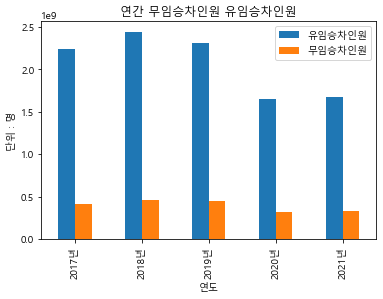

In [87]:
seoul_year3.T.plot.bar()
plt.title('연간 무임승차인원 유임승차인원')
plt.xlabel('연도')
plt.ylabel('단위 : 명')

In [88]:
seoul_year4=seoul_year3.T
seoul_year4['합계']=seoul_year4['무임승차인원']+seoul_year4['유임승차인원']
seoul_year4


,유임승차인원,무임승차인원,합계
2017년,2236677884,409775569,2646453453
2018년,2443568819,454440806,2898009625
2019년,2315157972,450792842,2765950814
2020년,1652983971,315383439,1968367410
2021년,1672578227,335194905,2007773132


In [89]:
seoul_year4['비율']=round(seoul_year4['무임승차인원']/seoul_year4['합계']*100,2)
seoul_year4

,유임승차인원,무임승차인원,합계,비율
2017년,2236677884,409775569,2646453453,15.48
2018년,2443568819,454440806,2898009625,15.68
2019년,2315157972,450792842,2765950814,16.30
2020년,1652983971,315383439,1968367410,16.02
2021년,1672578227,335194905,2007773132,16.69


In [90]:
seoul_year5=seoul_year4[['비율']]
seoul_year5

,비율
2017년,15.48
2018년,15.68
2019년,16.30
2020년,16.02
2021년,16.69


<AxesSubplot:>

Text(0.5, 1.0, '연간 무임승차자 비율')

Text(0.5, 0, '연도')

Text(0, 0.5, '단위 :%')

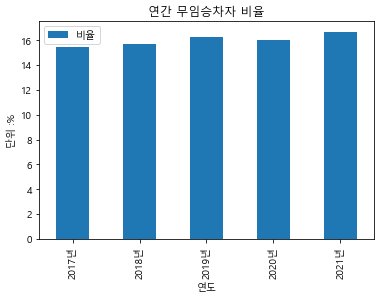

In [91]:
seoul_year5.plot.bar()
plt.title('연간 무임승차자 비율')
plt.xlabel('연도')
plt.ylabel('단위 :%')

In [95]:
seoul_line= seoul_year
seoul_line

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,작업일자
0,202212,1호선,서울역,1350791,196523,1316828,187268,20230103
1,202212,1호선,시청,672846,96623,665583,93198,20230103
2,202212,1호선,종각,975925,150911,949944,141309,20230103
3,202212,1호선,종로3가,490967,309071,450017,287432,20230103
4,202212,1호선,종로5가,476315,247835,470710,238588,20230103
...,...,...,...,...,...,...,...,...
57389,201501,9호선,노량진,817907,864989,114416,119275,20150206
57390,201501,9호선,사평,70919,67069,14085,13931,20150206
57391,201501,9호선,노들,121496,100670,27470,25964,20150206
57392,201501,9호선,가양,469127,439698,107695,104082,20150206


In [96]:
seoul_line2=seoul_line[['호선명','유임승차인원','무임승차인원']]
seoul_line2

,호선명,유임승차인원,무임승차인원
0,1호선,1350791,196523
1,1호선,672846,96623
2,1호선,975925,150911
3,1호선,490967,309071
4,1호선,476315,247835
...,...,...,...
57389,9호선,817907,864989
57390,9호선,70919,67069
57391,9호선,121496,100670
57392,9호선,469127,439698


In [97]:
mark_line = (seoul_line2.호선명 == '1호선')

line1 = seoul_line2[mark_line]
line1.reset_index(inplace=True, drop=True)
line1

,호선명,유임승차인원,무임승차인원
0,1호선,1350791,196523
1,1호선,672846,96623
2,1호선,975925,150911
3,1호선,490967,309071
4,1호선,476315,247835
...,...,...,...
995,1호선,639441,636014
996,1호선,850077,819933
997,1호선,1890411,1667163
998,1호선,582547,602667


In [98]:
mark_line2 = (seoul_line2.호선명 == '2호선')

line2 = seoul_line2[mark_line2]
line2.reset_index(inplace=True, drop=True)
line2

,호선명,유임승차인원,무임승차인원
0,2호선,682510,59541
1,2호선,1330792,112244
2,2호선,621414,79716
3,2호선,320903,81514
4,2호선,366417,55918
...,...,...,...
4995,2호선,201426,189620
4996,2호선,1974870,1930373
4997,2호선,280645,303487
4998,2호선,2264435,2035737


In [99]:
mark_line3 = (seoul_line2.호선명 == '3호선')

line3 = seoul_line2[mark_line3]
line3.reset_index(inplace=True, drop=True)
line3

,호선명,유임승차인원,무임승차인원
0,3호선,145759,28681
1,3호선,504350,116746
2,3호선,806051,247242
3,3호선,341170,135931
4,3호선,377800,76141
...,...,...,...
3395,3호선,38,0
3396,3호선,151167,155842
3397,3호선,252387,262774
3398,3호선,226673,240245


In [100]:
mark_line4 = (seoul_line2.호선명 == '4호선')

line4 = seoul_line2[mark_line4]
line4.reset_index(inplace=True, drop=True)
line4

,호선명,유임승차인원,무임승차인원
0,4호선,199379,71831
1,4호선,439946,116475
2,4호선,481540,92348
3,4호선,550644,195252
4,4호선,693368,166319
...,...,...,...
2595,4호선,257256,283880
2596,4호선,661018,605985
2597,4호선,536173,470361
2598,4호선,343494,370255


In [101]:
mark_line5 = (seoul_line2.호선명 == '5호선')

line5 = seoul_line2[mark_line5]
line5.reset_index(inplace=True, drop=True)
line5

,호선명,유임승차인원,무임승차인원
0,5호선,146660,50235
1,5호선,125326,38154
2,5호선,205092,36487
3,5호선,145240,48189
4,5호선,265147,41354
...,...,...,...
5224,5호선,75941,61823
5225,5호선,298972,241620
5226,5호선,229279,218496
5227,5호선,81161,98024


In [102]:
mark_line6 = (seoul_line2.호선명 == '6호선')

line6 = seoul_line2[mark_line6]
line6.reset_index(inplace=True, drop=True)
line6

,호선명,유임승차인원,무임승차인원
0,6호선,404385,113028
1,6호선,79696,30865
2,6호선,94393,39602
3,6호선,61224,18725
4,6호선,17,3
...,...,...,...
3833,6호선,185728,207358
3834,6호선,64212,68735
3835,6호선,63070,72605
3836,6호선,317687,234766


In [103]:
mark_line7 = (seoul_line2.호선명 == '7호선')

line7 = seoul_line2[mark_line7]
line7.reset_index(inplace=True, drop=True)
line7

,호선명,유임승차인원,무임승차인원
0,7호선,59111,9323
1,7호선,216908,42946
2,7호선,283888,94517
3,7호선,298014,84447
4,7호선,482896,125884
...,...,...,...
5045,7호선,278930,257383
5046,7호선,481456,526382
5047,7호선,341474,326733
5048,7호선,275945,250335


In [104]:
mark_line8 = (seoul_line2.호선명 == '8호선')

line8 = seoul_line2[mark_line8]
line8.reset_index(inplace=True, drop=True)
line8

,호선명,유임승차인원,무임승차인원
0,8호선,447996,102796
1,8호선,362116,83858
2,8호선,242935,65691
3,8호선,155304,33380
4,8호선,448809,78527
...,...,...,...
1709,8호선,269125,323557
1710,8호선,225766,239659
1711,8호선,347538,303534
1712,8호선,512794,569800


In [105]:
line1_1=line1.T
line1_2=line1_1.drop('호선명')
line1_2['1호선']= line1_2.sum(axis=1)
line1_2
line1_3=pd.DataFrame(line1_2['1호선'])
line1_3
line1_4=line1_3.T
line1_4['합계']=line1_4['무임승차인원']+line1_4['유임승차인원']
line1_4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1호선
유임승차인원,1350791,672846,975925,490967,476315,230076,288269,238529,344620,134207,1316422,653911,924585,485926,436948,220069,285012,233878,341039,135459,638454,893135,499373,442041,231006,...,413062,776822,302851,619323,1688548,312964,147391,251837,317717,510467,502934,520415,691413,1105535,336981,374981,286925,155556,1353882,639441,850077,1890411,582547,590927,551550094.0
무임승차인원,196523,96623,150911,309071,247835,120749,114634,257360,242950,137351,203139,97339,141959,300364,242398,117440,117073,266335,247954,151050,119508,153798,319982,260373,124571,...,405091,720776,300914,642545,1490571,368884,164950,252779,308150,532712,512176,516568,654549,1041530,390926,363032,285937,171171,1288680,636014,819933,1667163,602667,599790,244149418.0


,1호선
유임승차인원,551550094.0
무임승차인원,244149418.0


,유임승차인원,무임승차인원,합계
1호선,551550094.0,244149418.0,795699512.0


In [106]:
line2_1=line2.T
line2_2=line2_1.drop('호선명')
line2_2['2호선']= line2_2.sum(axis=1)



In [107]:
line2_2
line2_3=pd.DataFrame(line2_2['2호선'])
line2_3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999,2호선
유임승차인원,682510,1330792,621414,320903,366417,332054,356131,449999,289301,597454,1044298,1023669,601937,854068,327289,2324994,568345,237836,1571585,1347796,1270522,2180108,790257,563758,422651,...,1521424,528644,542338,999733,370286,1765773,168690,89457,458205,21972,670303,800857,260252,28913,1242112,43967,1442997,487427,613297,201426,1974870,280645,2264435,1389174,3.715756e+09
무임승차인원,59541,112244,79716,81514,55918,93097,66127,54082,12947,57918,103377,91783,106468,117193,84304,209443,111484,45775,125851,217436,148559,161741,161653,89047,77447,...,1326153,459377,541379,951763,392134,1774970,181699,86155,434608,24048,636477,765740,259971,34082,1372098,47048,1476389,482581,663754,189620,1930373,303487,2035737,1370024,8.711875e+08


,2호선
유임승차인원,3.715756e+09
무임승차인원,8.711875e+08


In [108]:
line2_4=line2_3.T
line2_4['합계']=line2_4['무임승차인원']+line2_4['유임승차인원']
line2_4

,유임승차인원,무임승차인원,합계
2호선,3.715756e+09,871187547.0,4.586944e+09


In [109]:
line3_1=line3.T
line3_2=line3_1.drop('호선명')
line3_2['3호선']= line3_2.sum(axis=1)
line3_2
line3_3=pd.DataFrame(line3_2['3호선'])
line3_3
line3_4=line3_3.T
line3_4['합계']=line3_4['무임승차인원']+line3_4['유임승차인원']
line3_4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3호선
유임승차인원,145759,504350,806051,341170,377800,383523,90087,147966,601916,657238,233214,273362,47,245707,306068,181402,203819,844024,807381,112225,1325069,346770,755231,925619,287857,...,369269,196997,142654,180851,25624,450397,192798,211335,185160,185700,349755,599252,311663,1624401,661781,291181,211871,85583,274518,38,151167,252387,226673,1094512,1.291679e+09
무임승차인원,28681,116746,247242,135931,76141,138450,30343,63228,87134,98485,59191,52494,2,35700,81560,52281,57963,138187,71896,30332,199687,77061,123276,154547,64843,...,306792,181377,138225,157370,26567,414511,267603,250352,182259,166605,329772,644005,288566,1680989,720816,302218,192147,88449,237865,0,155842,262774,240245,1179984,3.797220e+08


,3호선
유임승차인원,1.291679e+09
무임승차인원,3.797220e+08


,유임승차인원,무임승차인원,합계
3호선,1.291679e+09,379722046.0,1.671401e+09


In [110]:
line4_1=line4.T
line4_2=line4_1.drop('호선명')
line4_2['4호선']= line4_2.sum(axis=1)
line4_2
line4_3=pd.DataFrame(line4_2['4호선'])
line4_3
line4_4=line4_3.T
line4_4['합계']=line4_4['무임승차인원']+line4_4['유임승차인원']
line4_4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,2576,2577,2578,2579,2580,2581,2582,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,4호선
유임승차인원,199379,439946,481540,550644,693368,831142,333862,631941,507893,547195,339877,998662,416628,469765,675484,842309,620804,308817,371510,156219,490888,243951,23066,412862,724208,...,1110438,610788,550301,47701,1211915,277180,381209,302175,588698,626466,904059,852351,1113556,829737,715599,138257,429323,24889,666658,257256,661018,536173,343494,837781,1.331388e+09
무임승차인원,71831,116475,92348,195252,166319,188411,109187,178741,115060,85210,70934,129626,144060,59612,117590,73768,180939,38494,54091,26301,53146,48107,11117,144207,104844,...,1073695,557234,619606,50075,1270131,520174,364110,279763,624002,710718,707117,716160,1221559,867245,784879,178987,381799,19409,619459,283880,605985,470361,370255,806517,3.951232e+08


,4호선
유임승차인원,1.331388e+09
무임승차인원,3.951232e+08


,유임승차인원,무임승차인원,합계
4호선,1.331388e+09,395123233.0,1.726511e+09


In [111]:
line5_1=line5.T
line5_2=line5_1.drop('호선명')
line5_2['5호선']= line5_2.sum(axis=1)
line5_2
line5_3=pd.DataFrame(line5_2['5호선'])
line5_3
line5_4=line5_3.T
line5_4['합계']=line5_4['무임승차인원']+line5_4['유임승차인원']
line5_4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,5205,5206,5207,5208,5209,5210,5211,5212,5213,5214,5215,5216,5217,5218,5219,5220,5221,5222,5223,5224,5225,5226,5227,5228,5호선
유임승차인원,146660,125326,205092,145240,265147,521722,335181,700117,690568,332908,399681,559022,179192,95644,245636,114419,813785,308265,361033,362728,155458,114897,487505,906496,359864,...,342973,184361,358222,416720,165380,220767,164977,731835,96204,280180,153883,404720,117400,126745,600408,387595,74933,368673,142028,75941,298972,229279,81161,172893,1.430004e+09
무임승차인원,50235,38154,36487,48189,41354,98667,90976,143145,156907,64085,80055,89098,28334,20606,74190,11331,56978,27404,64508,48692,36812,14570,68782,95829,98212,...,367506,200101,381433,379733,153365,217639,184503,666404,97412,312276,156795,421410,109441,127278,659127,374825,86829,288509,147647,61823,241620,218496,98024,185513,4.170849e+08


,5호선
유임승차인원,1.430004e+09
무임승차인원,4.170849e+08


,유임승차인원,무임승차인원,합계
5호선,1.430004e+09,417084867.0,1.847089e+09


In [112]:
line6_1=line6.T
line6_2=line6_1.drop('호선명')
line6_2['6호선']= line6_2.sum(axis=1)
line6_2
line6_3=pd.DataFrame(line6_2['6호선'])
line6_3
line6_4=line6_3.T
line6_4['합계']=line6_4['무임승차인원']+line6_4['유임승차인원']
line6_4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,3814,3815,3816,3817,3818,3819,3820,3821,3822,3823,3824,3825,3826,3827,3828,3829,3830,3831,3832,3833,3834,3835,3836,3837,6호선
유임승차인원,404385,79696,94393,61224,17,180772,289629,225424,347963,86257,341030,358648,381456,284602,214063,212352,461050,173577,202884,133720,283102,245047,49898,83603,88576,...,185346,58853,409940,134228,77928,144203,275664,162521,323986,85275,389623,206531,232348,15,197493,204664,316312,138988,317989,185728,64212,63070,317687,305071,818610998.0
무임승차인원,113028,30865,39602,18725,3,48999,82642,68881,56007,44463,76768,75377,40654,20728,47921,46564,75554,36618,19713,18083,31422,15346,13224,22035,19226,...,177165,55563,396462,129665,95553,126452,295316,195328,278397,87842,430057,180504,223012,0,209604,207291,323225,148372,318451,207358,68735,72605,234766,284002,237520002.0


,6호선
유임승차인원,818610998.0
무임승차인원,237520002.0


,유임승차인원,무임승차인원,합계
6호선,818610998.0,237520002.0,1.056131e+09


In [113]:
line7_1=line7.T
line7_2=line7_1.drop('호선명')
line7_2['7호선']= line7_2.sum(axis=1)
line7_2
line7_3=pd.DataFrame(line7_2['7호선'])
line7_3
line7_4=line7_3.T
line7_4['합계']=line7_4['무임승차인원']+line7_4['유임승차인원']
line7_4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,5026,5027,5028,5029,5030,5031,5032,5033,5034,5035,5036,5037,5038,5039,5040,5041,5042,5043,5044,5045,5046,5047,5048,5049,7호선
유임승차인원,59111,216908,283888,298014,482896,333009,424934,283840,224050,237253,251777,435630,356406,377344,137005,255888,369668,407424,354075,178913,464719,413073,587934,461502,146461,...,471891,357592,255619,378381,324627,197730,409635,446338,160639,221661,370450,206621,588155,315921,296356,138751,139483,252807,139748,278930,481456,341474,275945,385387,1.684307e+09
무임승차인원,9323,42946,94517,84447,125884,87882,106183,69354,43711,65379,62755,73243,94338,97176,34721,61504,79350,39805,58179,41434,77615,53073,61754,43656,35878,...,437811,372517,243775,385219,330774,192468,393489,442134,151493,228834,276574,190896,503242,234338,293571,122405,126558,241487,126401,257383,526382,326733,250335,362576,4.554912e+08


,7호선
유임승차인원,1.684307e+09
무임승차인원,4.554912e+08


,유임승차인원,무임승차인원,합계
7호선,1.684307e+09,455491233.0,2.139798e+09


In [114]:
line8_1=line8.T
line8_2=line8_1.drop('호선명')
line8_2['8호선']= line8_2.sum(axis=1)
line8_2
line8_3=pd.DataFrame(line8_2['8호선'])
line8_3
line8_4=line8_3.T
line8_4['합계']=line8_4['무임승차인원']+line8_4['유임승차인원']
line8_4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,1690,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706,1707,1708,1709,1710,1711,1712,1713,8호선
유임승차인원,447996,362116,242935,155304,448809,181978,207532,175439,515022,443788,231581,123638,325170,258348,111976,117138,91039,149860,445263,233762,152335,375167,192729,159508,511157,...,369023,299269,81119,267862,106320,105274,152957,152234,175781,115949,259593,434855,123234,117541,182864,90667,307412,157863,323192,269125,225766,347538,512794,135696,419787367.0
무임승차인원,102796,83858,65691,33380,78527,51022,61753,63532,61173,81474,37578,30846,74598,70664,40673,45034,51662,28322,103012,64355,34592,70311,59834,61872,60774,...,322095,263807,62698,253039,108366,110140,144568,183405,166092,105371,269234,378227,124379,121888,129434,69400,290929,170534,311127,323557,239659,303534,569800,129859,126591864.0


,8호선
유임승차인원,419787367.0
무임승차인원,126591864.0


,유임승차인원,무임승차인원,합계
8호선,419787367.0,126591864.0,546379231.0


In [115]:
seoul_line3 = pd.concat([line1_4,line2_4,line3_4,line4_4,line5_4,line6_4,line7_4,line8_4])
seoul_line3

,유임승차인원,무임승차인원,합계
1호선,5.515501e+08,244149418.0,7.956995e+08
2호선,3.715756e+09,871187547.0,4.586944e+09
3호선,1.291679e+09,379722046.0,1.671401e+09
4호선,1.331388e+09,395123233.0,1.726511e+09
5호선,1.430004e+09,417084867.0,1.847089e+09
6호선,8.186110e+08,237520002.0,1.056131e+09
7호선,1.684307e+09,455491233.0,2.139798e+09
8호선,4.197874e+08,126591864.0,5.463792e+08


In [116]:
seoul_line4=seoul_line3[['무임승차인원','합계']]
seoul_line4

,무임승차인원,합계
1호선,244149418.0,7.956995e+08
2호선,871187547.0,4.586944e+09
3호선,379722046.0,1.671401e+09
4호선,395123233.0,1.726511e+09
5호선,417084867.0,1.847089e+09
6호선,237520002.0,1.056131e+09
7호선,455491233.0,2.139798e+09
8호선,126591864.0,5.463792e+08


In [117]:
seoul_line4['비율'] = round(seoul_line4['무임승차인원']/seoul_line4['합계']*100,2)
seoul_line4

,무임승차인원,합계,비율
1호선,244149418.0,7.956995e+08,30.68
2호선,871187547.0,4.586944e+09,18.99
3호선,379722046.0,1.671401e+09,22.72
4호선,395123233.0,1.726511e+09,22.89
5호선,417084867.0,1.847089e+09,22.58
6호선,237520002.0,1.056131e+09,22.49
7호선,455491233.0,2.139798e+09,21.29
8호선,126591864.0,5.463792e+08,23.17


In [118]:
seoul_line5=seoul_line4['비율']

<AxesSubplot:>

Text(0.5, 1.0, '지하철 호선별 무임승차자 비율')

Text(0.5, 0, '지하철 호선')

Text(0, 0.5, '단위 : %')

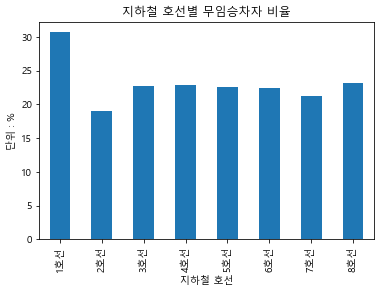

In [119]:
seoul_line5.plot.bar()
plt.title('지하철 호선별 무임승차자 비율')
plt.xlabel('지하철 호선')
plt.ylabel('단위 : %')

In [ ]:
#6번

In [28]:
loss=budget3.T
loss

서울교통공사,매출액,손실액,손실비율,손실비율증감
2017,1145373.0,407415.0,35.57,NaN
2018,1986511.0,538892.0,27.13,-23.73
2019,2004643.0,586467.0,29.26,7.85
2020,1559524.0,1113736.0,71.42,144.09
2021,1629129.0,964440.0,59.20,-17.11


In [29]:
loss.columns.name='연도'
loss

연도,매출액,손실액,손실비율,손실비율증감
2017,1145373.0,407415.0,35.57,NaN
2018,1986511.0,538892.0,27.13,-23.73
2019,2004643.0,586467.0,29.26,7.85
2020,1559524.0,1113736.0,71.42,144.09
2021,1629129.0,964440.0,59.20,-17.11


In [30]:
loss2=loss.drop('매출액',axis=1)
loss2

연도,손실액,손실비율,손실비율증감
2017,407415.0,35.57,NaN
2018,538892.0,27.13,-23.73
2019,586467.0,29.26,7.85
2020,1113736.0,71.42,144.09
2021,964440.0,59.20,-17.11


In [31]:
loss2.fillna(0, inplace=True)
loss2

연도,손실액,손실비율,손실비율증감
2017,407415.0,35.57,0.00
2018,538892.0,27.13,-23.73
2019,586467.0,29.26,7.85
2020,1113736.0,71.42,144.09
2021,964440.0,59.20,-17.11


In [59]:
seoul_old5

,노인 무임비용,총 무임비용,비율
2017,283059,350647,80.72
2018,288617,353974,81.54
2019,304929,370926,82.21
2020,216135,264255,81.79
2021,231108,278438,83.00


In [60]:
seoul_old5.rename(columns={'노인 무임 비용':'노인 무임비용'},inplace=True)
seoul_old5

,노인 무임비용,총 무임비용,비율
2017,283059,350647,80.72
2018,288617,353974,81.54
2019,304929,370926,82.21
2020,216135,264255,81.79
2021,231108,278438,83.00


In [61]:
loss_free=pd.concat([loss2,seoul_old5],axis=1)
loss_free

,손실액,손실비율,손실비율증감,노인 무임비용,총 무임비용,비율
2017,407415.0,35.57,0.00,283059,350647,80.72
2018,538892.0,27.13,-23.73,288617,353974,81.54
2019,586467.0,29.26,7.85,304929,370926,82.21
2020,1113736.0,71.42,144.09,216135,264255,81.79
2021,964440.0,59.20,-17.11,231108,278438,83.00


In [68]:
l_f2017= round(loss_free['총 무임비용']['2017']/loss_free['손실액']['2017']*100, 2)
l_f2018= round(loss_free['총 무임비용']['2018']/loss_free['손실액']['2018']*100, 2)
l_f2019= round(loss_free['총 무임비용']['2019']/loss_free['손실액']['2019']*100, 2)
l_f2020= round(loss_free['총 무임비용']['2020']/loss_free['손실액']['2020']*100, 2)
l_f2021= round(loss_free['총 무임비용']['2021']/loss_free['손실액']['2021']*100, 2)

In [75]:
loss_free['적자대비 총무임비']=[l_f2017,l_f2018,l_f2019,l_f2020,l_f2021]
loss_free

,손실액,손실비율,손실비율증감,노인 무임비용,총 무임비용,비율,적자대비 총무임비
2017,407415.0,35.57,0.00,283059,350647,80.72,86.07
2018,538892.0,27.13,-23.73,288617,353974,81.54,65.69
2019,586467.0,29.26,7.85,304929,370926,82.21,63.25
2020,1113736.0,71.42,144.09,216135,264255,81.79,23.73
2021,964440.0,59.20,-17.11,231108,278438,83.00,28.87


In [76]:
l_g_f2017= round(loss_free['노인 무임비용']['2017']/loss_free['손실액']['2017']*100, 2)
l_g_f2018= round(loss_free['노인 무임비용']['2018']/loss_free['손실액']['2018']*100, 2)
l_g_f2019= round(loss_free['노인 무임비용']['2019']/loss_free['손실액']['2019']*100, 2)
l_g_f2020= round(loss_free['노인 무임비용']['2020']/loss_free['손실액']['2020']*100, 2)
l_g_f2021= round(loss_free['노인 무임비용']['2021']/loss_free['손실액']['2021']*100, 2)

In [77]:
loss_free['적자대비 노인무임비']=[l_g_f2017,l_g_f2018,l_g_f2019,l_g_f2020,l_g_f2021]
loss_free

,손실액,손실비율,손실비율증감,노인 무임비용,총 무임비용,비율,적자대비 총무임비,적자대비 노인무임비
2017,407415.0,35.57,0.00,283059,350647,80.72,86.07,69.48
2018,538892.0,27.13,-23.73,288617,353974,81.54,65.69,53.56
2019,586467.0,29.26,7.85,304929,370926,82.21,63.25,51.99
2020,1113736.0,71.42,144.09,216135,264255,81.79,23.73,19.41
2021,964440.0,59.20,-17.11,231108,278438,83.00,28.87,23.96
